In [5]:
#import os library to interact with the operaing system
import os

#import libraries to load data into dataframe and for operations
import pandas as pd
from scipy.stats import norm 
import statistics
import numpy as np

#import library to get day names of the week
from datetime import datetime

#import seaborn and matplotlib.pyplot to create visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#loading the .csv files into dataframes

daily_activity = pd.read_csv("E:\Data Analytics stuff\Coursera Data analytics and Adv Data Analytics\Google Data Analytics Project\Capstone 2\Fitabase_Data_04122016_05122016\dailyActivity_merged.csv")
heartrate = pd.read_csv("E:\Data Analytics stuff\Coursera Data analytics and Adv Data Analytics\Google Data Analytics Project\Capstone 2\Fitabase_Data_04122016_05122016\heartrate_seconds_merged.csv")
sleep = pd.read_csv("E:\Data Analytics stuff\Coursera Data analytics and Adv Data Analytics\Google Data Analytics Project\Capstone 2\Fitabase_Data_04122016_05122016\sleepDay_merged.csv")
sleep_type = pd.read_csv("E:\Data Analytics stuff\Coursera Data analytics and Adv Data Analytics\Google Data Analytics Project\Capstone 2\Fitabase_Data_04122016_05122016\minuteSleep_merged.csv")


hourly_steps = pd.read_csv("E:\Data Analytics stuff\Coursera Data analytics and Adv Data Analytics\Google Data Analytics Project\Capstone 2\Fitabase_Data_04122016_05122016\hourlySteps_merged.csv")

'hourly_steps = pd.read_csv("E:\\Data Analytics stuff\\Coursera Data analytics and Adv Data Analytics\\Google Data Analytics Project\\Capstone 2\\Fitabase_Data_04122016_05122016\\hourlySteps_merged.csv")\nheart_rate = pd.read_csv("E:\\Data Analytics stuff\\Coursera Data analytics and Adv Data Analytics\\Google Data Analytics Project\\Capstone 2\\Fitabase_Data_04122016_05122016\\heartrate_seconds_merged.csv")\n'

In [9]:
heart_rate = pd.read_csv("E:\Data Analytics stuff\Coursera Data analytics and Adv Data Analytics\Google Data Analytics Project\Capstone 2\Fitabase_Data_04122016_05122016\heartrate_seconds_merged.csv")

In [7]:
heartrate = pd.read_csv("E:\Data Analytics stuff\Coursera Data analytics and Adv Data Analytics\Google Data Analytics Project\Capstone 2\Fitabase_Data_04122016_05122016\heartrate_seconds_merged.csv")

In [4]:
#inspecting the data in daily_activity dataframe
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [4]:
#check the number of users in the dataframe

print("Unique users in dataframe are :")
len(daily_activity.Id.unique())

Unique users in dataframe are :


33

In [5]:
#carry out statistical analysis for the dataframe
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [6]:
#Aggregate the daily_activity dataframe to get the mean values by ID

daily_activity_agg = daily_activity.groupby('Id').agg({'TotalSteps': 'mean', 'TotalDistance': \
                                                       'mean', 'VeryActiveMinutes': 'mean', 'FairlyActiveMinutes': 'mean'})
daily_activity_agg.head()

,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes
Id,,,,
1503960366,12116.741935,7.809677,38.709677,19.161290
1624580081,5743.903226,3.914839,8.677419,5.806452
1644430081,7282.966667,5.295333,9.566667,21.366667
1844505072,2580.064516,1.706129,0.129032,1.290323
1927972279,916.129032,0.634516,1.322581,0.774194


In [7]:
daily_activity_agg.TotalActiveMinuites = daily_activity_agg.VeryActiveMinutes + daily_activity_agg.FairlyActiveMinutes

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_11164\3134664538.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  daily_activity_agg.TotalActiveMinuites = daily_activity_agg.VeryActiveMinutes + daily_activity_agg.FairlyActiveMinutes


In [8]:
#count the number of users who have average total steps less than the average total steps of the population

print("Percentage of users who cover steps below the average steps of total population:", \
      round(daily_activity_agg[daily_activity_agg['TotalSteps'] < 7637]['TotalSteps'].count()*100/33,2),"%")


#count the number of #count the number of users who have average total steps less than the recommended 10000 steps

print("Percentage of users who cover more than the recommended 8000 daily steps:", \
      round(100 - daily_activity_agg[daily_activity_agg['TotalSteps'] < 8000]['TotalSteps'].count()*100/33,2),"%")

Percentage of users who cover steps below the average steps of total population: 54.55 %
Percentage of users who cover more than the recommended 8000 daily steps: 42.42 %


In [9]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

In [10]:
# add a column day_no of the week to dataframe daily_activity
daily_activity['day_no'] = daily_activity['ActivityDate'].dt.dayofweek

In [11]:
# add a column day of the week to dataframe daily_activity
daily_activity['day_of_week'] = daily_activity['day_no'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

In [12]:
day_activity_agg = daily_activity.groupby(['day_no','day_of_week']).agg({'TotalSteps': 'mean', 'TotalDistance': \
                                                       'mean', 'VeryActiveMinutes': 'mean', 'FairlyActiveMinutes': 'mean'})

In [13]:
#resetting the index for the aggregated table

d = {'TotalSteps_mean':'TotalSteps_mean',
     'TotalDistance_mean':'TotalDistance_mean',
     'VeryActiveMinutes_mean':'VeryActiveMinutes_mean',
     'FairlyActiveMinutes_mean':'FairlyActiveMinutes_mean'
     }
day_activity_agg = day_activity_agg.rename(columns=d).reset_index()
print(day_activity_agg)

   day_no day_of_week   TotalSteps  TotalDistance  VeryActiveMinutes  \
0       0      Monday  7780.866667       5.552917          23.108333   
1       1     Tuesday  8125.006579       5.832237          22.953947   
2       2   Wednesday  7559.373333       5.488333          20.780000   
3       3    Thursday  7405.836735       5.312245          19.408163   
4       4      Friday  7448.230159       5.309921          20.055556   
5       5    Saturday  8152.975806       5.854677          21.919355   
6       6      Sunday  6933.231405       5.027190          19.983471   

   FairlyActiveMinutes  
0            14.000000  
1            14.335526  
2            13.100000  
3            11.959184  
4            12.111111  
5            15.201613  
6            14.528926  


Text(1.5, 8005, 'Daily Recommended Steps')

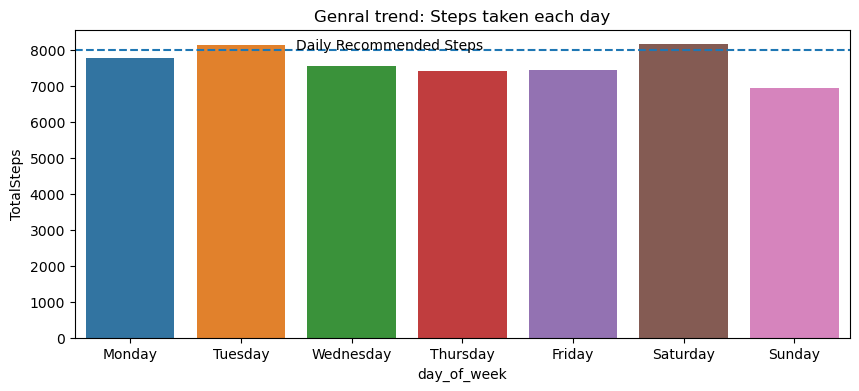

In [14]:
#Create a barplot to check day wise target achievement of 8000 steps

fig,axes = plt.subplots(figsize=(10,4))
axes.set_title("Genral trend: Steps taken each day")
sns.barplot(day_activity_agg,x='day_of_week',y='TotalSteps')
plt.axhline(y=8000, ls = '--')
plt.text(1.5,8005,"Daily Recommended Steps")

In [42]:
#change the data type for 'ActivityHour' to datetime from object data type

hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])
hourly_steps['ActivityHour'].dtype

#create a new column to extract and save the time from ActivityHour column
hourly_steps['activity_hour'] = hourly_steps['ActivityHour'].dt.time

In [43]:
#aggregate the hourly_steps data to get data hourwise

hourly_steps_agg = hourly_steps.groupby('activity_hour').agg({'StepTotal': 'mean'})

#reset index
d1 = {"StepTotal_mean":"Step_total"}
hourly_steps_agg = hourly_steps_agg.rename(columns=d1).reset_index()
hourly_steps_agg.head()

,activity_hour,StepTotal
0,00:00:00,42.188437
1,01:00:00,23.102894
2,02:00:00,17.110397
3,03:00:00,6.426581
4,04:00:00,12.699571


In [44]:
#calculate the hourly steps needed to achieve target of 10000 daily steps

print("Average hourly steps that needs to be achieved to ensure daily steps target is achieved:", round(8000/12,2))

Average hourly steps that needs to be achieved to ensure daily steps target is achieved: 666.67


Text(0, 0.5, 'Steps Taken')

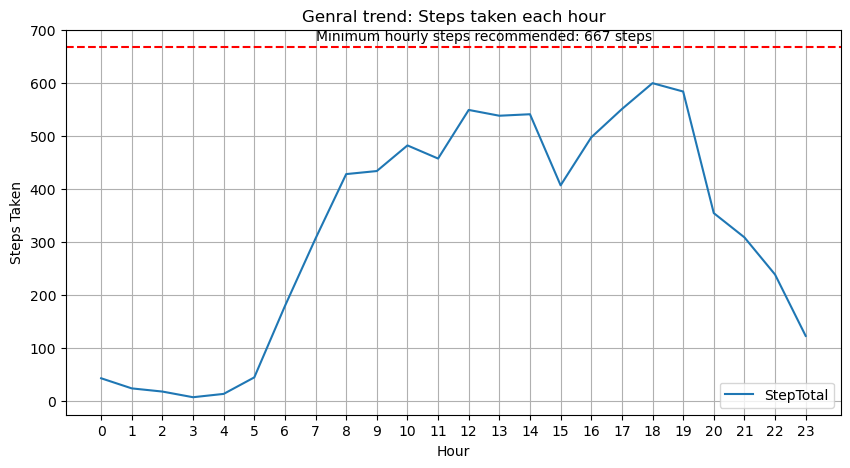

In [45]:
#Create a lineplot to check the least active hours throughout the day

fig,axes = plt.subplots(figsize=(10,5))
axes.set_title("Genral trend: Steps taken each hour")
sns.lineplot(hourly_steps_agg).set_xticks(list(range(0,24,1)))
plt.axhline(y=667, color = 'red', ls= '--')
plt.text(7,680,'Minimum hourly steps recommended: 667 steps')
plt.grid()
axes.set_xlabel("Hour")
axes.set_ylabel("Steps Taken")

Text(8005, 5, 'Steps:8000')

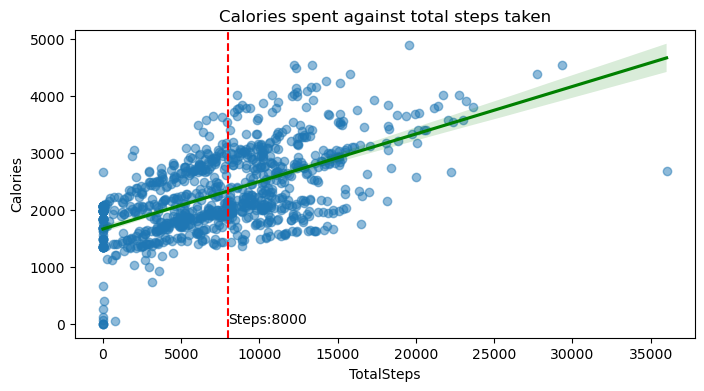

In [15]:
#Create a scatterplot to check the density of observations where total steps > 8000

fig,axes = plt.subplots(figsize=(8,4))
axes.set_title("Calories spent against total steps taken")
sns.regplot(daily_activity,x='TotalSteps',y='Calories',
                scatter_kws = {"alpha": 0.5},
                line_kws = {"color": "green"})
plt.axvline(x=8000, color = 'red', ls='--')
plt.text(8005,5,"Steps:8000")

In [40]:
#calculate the mean(calories burn) of observations where steps is less than 10000

print("Mean(calories burn) of observations where steps is less than 8000:",
     round(daily_activity[daily_activity['TotalSteps'] <8000]['Calories'].mean(),2))


#calculate the mean(calories burn) of observations where steps is greater than 10000

print("Mean(calories burn) of observations where steps is greater than 8000:",
     round(daily_activity[daily_activity['TotalSteps'] >= 8000]['Calories'].mean(),2))


#Calculate the difference in calories burnt

print("People who covered 8000 steps daily, on an avg. burnt {x} calories more than people who covered less than 8000 steps daily".\
      format(x = round(daily_activity[daily_activity['TotalSteps'] >= 8000]['Calories'].mean() - 
                 daily_activity[daily_activity['TotalSteps'] <8000]['Calories'].mean(),2)))

Mean(calories burn) of observations where steps is less than 8000: 1991.99
Mean(calories burn) of observations where steps is greater than 8000: 2668.49
People who covered 8000 steps daily, on an avg. burnt 676.5 calories more than people who covered less than 8000 steps daily


In [10]:
#convert the data type of column 'Time' to datetime
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'])

In [11]:
#create a new column to extract and save to hour from the 'time' column
heart_rate['hour'] = heart_rate['Time'].dt.hour

In [12]:
heart_rate['hour'].head()

0    7
1    7
2    7
3    7
4    7
Name: hour, dtype: int64

In [13]:
heart_rate_agg = heart_rate.groupby(['Id','hour'])['Value'].mean()
heart_rate_agg = heart_rate_agg.reset_index()

In [14]:
heart_rate_agg = heart_rate.groupby(['hour'])['Value'].mean()
heart_rate_agg = heart_rate_agg.reset_index()

Text(0.5, 1.0, 'Genral trend: Heartbeat each hour')

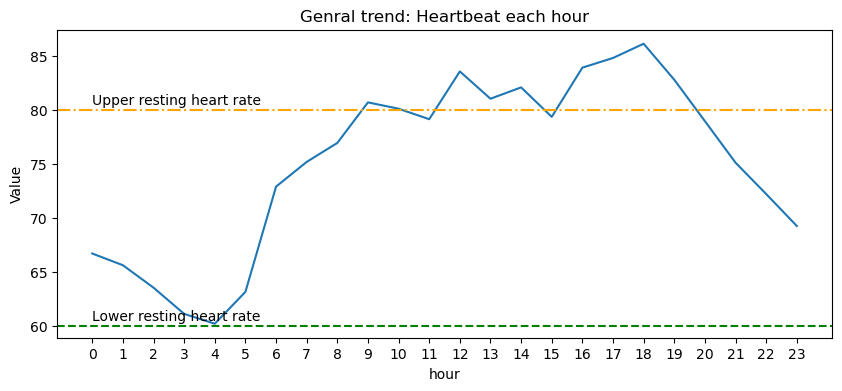

In [15]:
#create a line chart to show the general trend of heartbeat each hour.

fig,axes = plt.subplots(figsize=(10,4))
sns.lineplot(heart_rate_agg,x='hour',y='Value').set_xticks(range(0,24,1))
plt.axhline(y= 60, color = 'green', ls = '--')
plt.axhline(y= 80, color = 'orange', ls = '-.')
plt.text(0,60.5,'Lower resting heart rate')
plt.text(0,80.5,"Upper resting heart rate")
axes.set_title("Genral trend: Heartbeat each hour")

In [25]:
#load .csv files into dataframes

daily_sleep = pd.read_csv("E:\Data Analytics stuff\Coursera Data analytics and Adv Data Analytics\Google Data Analytics Project\Capstone 2\Fitabase_Data_04122016_05122016\sleepDay_merged.csv")
sleep_state = pd.read_csv("E:\Data Analytics stuff\Coursera Data analytics and Adv Data Analytics\Google Data Analytics Project\Capstone 2\Fitabase_Data_04122016_05122016\minuteSleep_merged.csv")

In [26]:
#aggregate the daily sleep dataframe by day and Id

daily_sleep_agg = daily_sleep.groupby(['Id','SleepDay']).agg({'TotalMinutesAsleep': 'mean', 'TotalTimeInBed':'mean'})
daily_sleep_agg = daily_sleep_agg.reset_index()
daily_activity['SleepDay'] = pd.to_datetime(daily_activity['ActivityDate'])
daily_sleep_agg['SleepDay'] = pd.to_datetime(daily_sleep_agg['SleepDay'])

In [27]:
#merge the daily activity and daily sleep dataframe

sleep_cal_joined = pd.merge(daily_sleep_agg, daily_activity,on = ['Id','SleepDay'],how = "inner")

<Axes: xlabel='TotalMinutesAsleep', ylabel='Calories'>

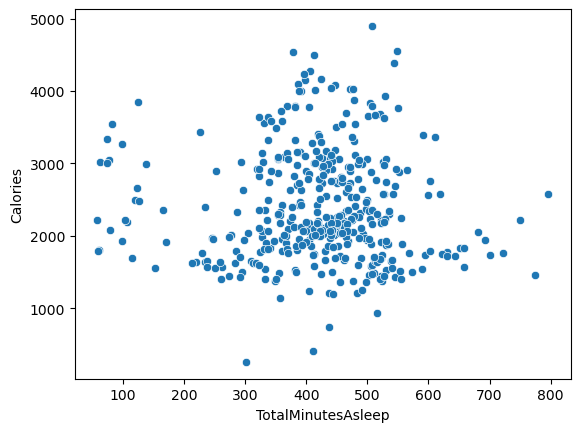

In [28]:
#create a scatterplot to visualize the total sleep vs calories burnt

sns.scatterplot(sleep_cal_joined,x='TotalMinutesAsleep',y='Calories')

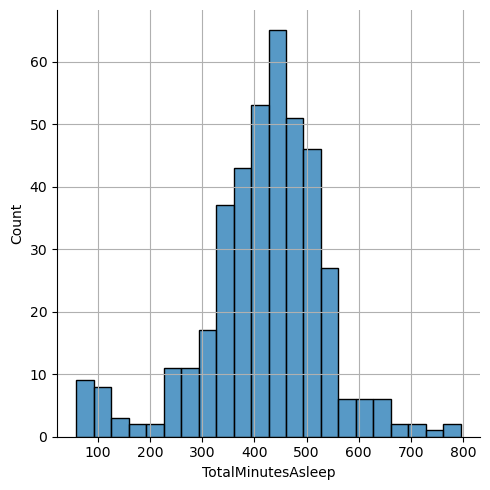

In [29]:
#create a distribution plot to understan how many people sleep between 6 to 8 hours

sns.displot(sleep_cal_joined['TotalMinutesAsleep'], kde = False )
plt.grid()

In [30]:
#create a new column to save the day name for each date

daily_sleep_agg['dayno_of_sleep'] = daily_sleep_agg['SleepDay'].dt.dayofweek

daily_sleep_agg['day_of_week'] = daily_sleep_agg['dayno_of_sleep'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

In [16]:
#Aggregate the daily sleep data on a daywise level to see daywise sleep trends

daywise_sleep_agg = daily_sleep_agg.groupby(['dayno_of_sleep','day_of_week'])\
[['TotalMinutesAsleep','TotalTimeInBed']].mean().reset_index()

NameError: name 'daily_sleep_agg' is not defined

<Axes: xlabel='day_of_week', ylabel='TotalMinutesAsleep'>

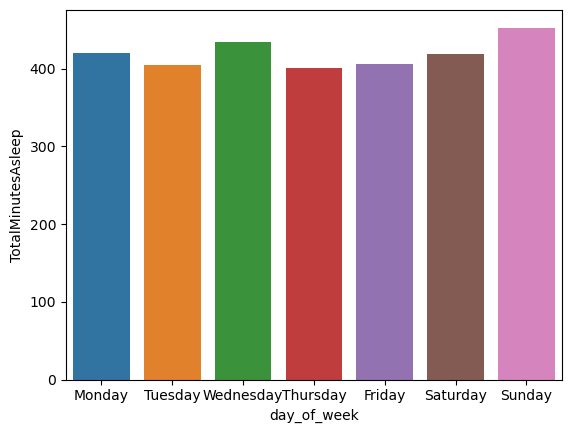

In [32]:
#create a barplot to see daywise sleep patterns

sns.barplot(daywise_sleep_agg,x='day_of_week',y='TotalMinutesAsleep')

In [33]:
#create a new column to extract and save the sleep hour

sleep_state['date'] = pd.to_datetime(sleep_state['date'])
sleep_state['hour'] = sleep_state['date'].dt.hour

In [35]:
#Aggregating Sleep State dataframe on hourly level to understand the sleep states at different hour
#value column has values: 1 = Asleep, 2= Restless, 3=Awake

#count the number of observations for various sleep values for each hour of the day
sleep_state_agg = sleep_state.groupby(['hour','value'])['Id'].count().reset_index()


#Map the sleep state to value column for easier understanding
sleep_state_agg['value'] = sleep_state_agg['value'].map({1:"Asleep",2:"Restless",3:"Awake"})


#rename the id column to Count 
sleep_state_agg.rename(columns = {'Id':"Count"})

,hour,value,Count
0,0,Asleep,15644
1,0,Restless,933
2,0,Awake,215
3,1,Asleep,17481
4,1,Restless,1198
...,...,...,...
67,22,Restless,786
68,22,Awake,163
69,23,Asleep,12322
70,23,Restless,1009


Text(0.5, 1.0, 'Count of hourwise sleep state')

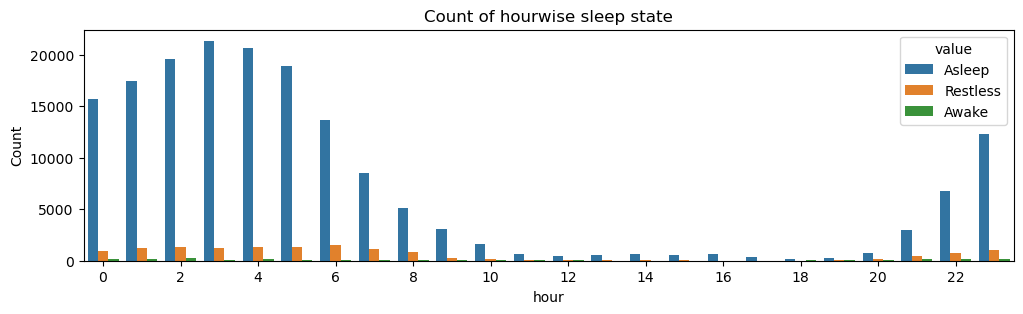

In [37]:
#Create a multi bar plot to see what time does people wake up and go to sleep

fig,axes = plt.subplots(figsize=(12,3))
sns.barplot(sleep_state_agg,x='hour',y='Id', hue='value').set_xticks(range(0,24,2))
axes.set_ylabel("Count")
axes.set_title("Count of hourwise sleep state")